In [109]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import (Adam,
                              SGD)

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import pandas as pd

In [110]:
exact_data = pd.read_excel("../UNT-Thermography-24/fused_silica_data/fused_silica_exact_train.xlsx")

exact_df = pd.DataFrame(exact_data)

X = exact_df[exact_df.columns[11:]]

Y = exact_df[exact_df.columns[0:11]]

print(f"The original data set has {exact_df.shape[0]} rows, and {exact_df.shape[1]} columns. "
      f"We want to predict {Y.shape[1]} output variables from {X.shape[1]} features")

exact_df.head()

The original data set has 10000 rows, and 77 columns. We want to predict 11 output variables from 66 features


,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
0,312.355087,301.649641,321.270850,324.903956,329.245296,337.694194,333.776774,333.750946,331.605971,333.828275,...,2.378753e-12,2.416740e-12,2.452565e-12,2.482976e-12,2.505710e-12,2.514345e-12,2.497372e-12,2.443515e-12,2.360022e-12,2.283099e-12
1,308.045992,314.390077,319.612686,324.021871,328.286597,324.268581,318.045216,310.205743,316.395558,315.206667,...,4.690686e-12,4.758857e-12,4.814785e-12,4.855500e-12,4.879557e-12,4.876002e-12,4.823191e-12,4.700047e-12,4.521287e-12,4.356649e-12
2,275.470643,334.023614,330.292063,333.180051,317.824092,306.451798,309.091647,312.060959,320.208051,336.027107,...,2.891349e-12,2.935824e-12,2.976514e-12,3.009965e-12,3.033863e-12,3.040662e-12,3.016554e-12,2.948046e-12,2.844024e-12,2.748188e-12
3,319.154096,314.324236,322.541381,324.154848,333.263850,344.199198,338.490892,334.185374,327.065180,303.761845,...,1.335647e-12,1.361978e-12,1.387258e-12,1.409588e-12,1.427626e-12,1.437648e-12,1.432962e-12,1.406923e-12,1.363502e-12,1.323517e-12
4,368.613557,330.588867,323.002818,322.824169,336.505619,328.080745,325.609686,335.941694,328.415271,330.880143,...,2.861867e-12,2.906931e-12,2.947792e-12,2.981218e-12,3.005087e-12,3.012002e-12,2.988298e-12,2.920602e-12,2.817710e-12,2.722916e-12


In [111]:
#Normalize features
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [112]:
#Goal: Using keras to implement a feed-forward neural network to predict temperatures of each layer given wavelength spectrum
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, Y, train_size = .8, random_state = 1337)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state = 1337)

X_test_scaled = scaler.transform(X_test)

print(
    f"Using {len(Y_train)} samples for training, "
    f"and {len(Y_test)} for testing "
    f"from {len(X_test) + len(X_train)} total samples."
)

Using 6400 samples for training, and 2000 for testing from 8400 total samples.


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30753.6738 - mae: 136.7994 - val_loss: 214.3971 - val_mae: 11.0748
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 192.2798 - mae: 10.2312 - val_loss: 173.2393 - val_mae: 9.5720
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 173.5538 - mae: 9.5917 - val_loss: 1187.3090 - val_mae: 29.3659
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 251.2768 - mae: 11.4141 - val_loss: 171.4950 - val_mae: 9.3830
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 171.5659 - mae: 9.5124 - val_loss: 149.9319 - val_mae: 8.6926
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 169.1246 - mae: 9.3289 - val_loss: 147.4748 - val_mae: 8.6624
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 165.9948 - mae: 9.3021 - val_loss: 161.5925 - val_mae: 9.1895
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 189.2609 - mae: 10.1397 - val_loss: 162.7890 - val_mae: 9.1001


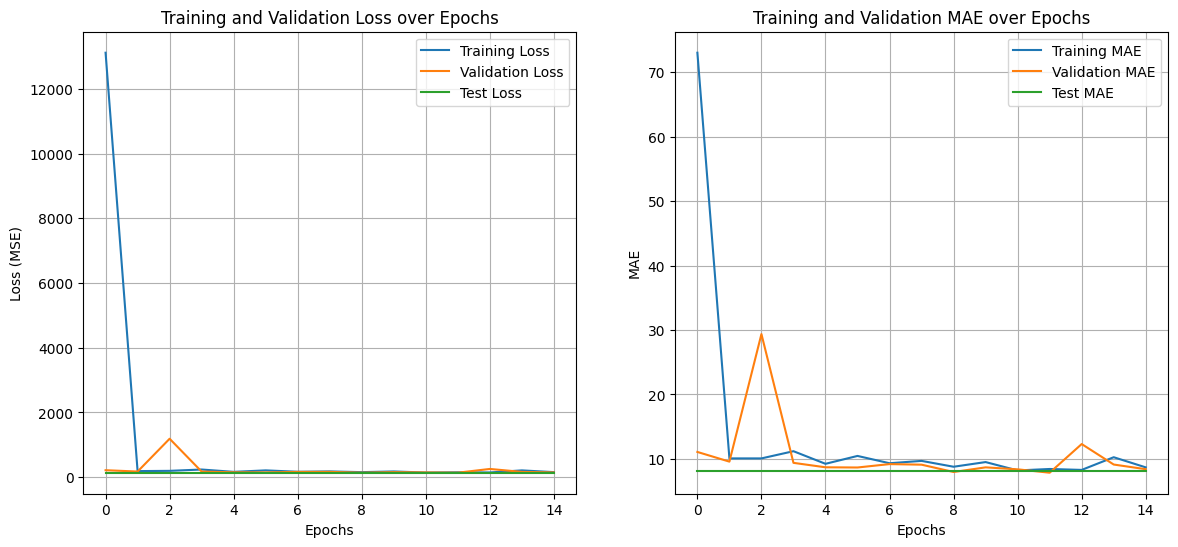

In [138]:
# Define the input shape
input_layer = keras.Input(shape=(X_train.shape[1],))

#Define the model (add more layers? increase nodes?)
exact_model = keras.Sequential([input_layer, #input_layer --> informs input shape
    Dense(256, activation="relu"), # first hidden layer
    Dense(128, activation="relu"), # second hidden layer
    # layers.Dense(20, activation="relu"), # third hidden layer
    # layers.Dense(20, activation="relu"), # fourth hidden layer
    Dense(11)  # Output layer with 11 neurons for each temperature target
])

# Compile the model
# Instantiate optimizer with adjustable learning rate
# observed: sweet spot .02 > x > .001
Adam1 = Adam(learning_rate = 0.009)
sgd = SGD(learning_rate = 0.009)

# Leverage both MSE and MAE (experimental)
# test different optimizers: SGD (*stochastic gradient descent: better for large data sets)
exact_model.compile(loss="mse", optimizer=Adam1, metrics=["mae"])  # Loss: MSE, Optimizer: Adam w/ MAE

# Train the model
# Thoughts: Overfit then implement regularization
# play around with batch size: batch size for larger datasets more likely to improve its performance
# Dima went up to 60 epochs for GaN_exact: later 600 -> imrpovement plateaus around 120 epochs
# plot loss over epochs
history = exact_model.fit(X_train, Y_train, epochs=15, validation_data = [X_val, Y_val])

#View Training Error
print(f"train_MSE: {history.history["loss"]}")
print(f"train_MAE: {history.history.get("mae", None)}")

# Evaluate the model on the validation set (separate call)
validation_loss, validation_accuracy = exact_model.evaluate(X_val, Y_val)

print(f"val_MSE: {validation_loss}, val_MAE: {validation_accuracy}")

test_loss, test_mae = exact_model.evaluate(X_test_scaled, Y_test)

print(f"test_MSE: {test_loss}, test_MAE: {test_mae}")

history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_mae'] = [test_mae] * len(history.history['mae'])

# Plot training & validation loss and mae values
plt.figure(figsize=(14, 6))

# Plot validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.plot(history.history["test_loss"], label='Test Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.plot(history.history["test_mae"], label="Test MAE")
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()




# Evaluate the model on unseen data
loss, mae = exact_model.evaluate(X_test, Y_test)
print("test_MSE:", loss)
print("test_MAE:", mae)

In [ ]:
#TODO:
#plot predictions against actual (scatter plot to see if similar)
#m nodes by n layers: want m*n to be less than number of data points
#per layer residual
#avg (above) to get overall residual
#plot error over epochs
#increase layers: implement loop
#change activation function to hyperbolic tangent: (theoretical difference: ReLu 0 and 1, tangent maintains positive and negative (if normalized data is positive and negative, it is possible tanegent would work better (consider what might happen if all data is positive)))
# 20 layers 250 nodes, batch size 15, epochs 220
#learning rate vs momenta/momento?? may reduce epochs

# Reading in MATLAB data

In [143]:
import scipy.io
mat = scipy.io.loadmat('../UNT-Thermography-24/fused_silica_data/data_GaN_8_15micron_1.mat')
Temp_all = mat.get('T_GaN_random')
Spectra_all = mat.get('Spectrum')

In [146]:
Spectra_all

array([[[7.22096510e-14, 6.56721634e-14, 8.20413120e-14, ...,
         8.19633505e-14, 6.60026685e-14, 7.84283614e-14],
        [7.45564406e-14, 6.78537388e-14, 8.42169663e-14, ...,
         8.39385451e-14, 6.81620300e-14, 8.14355013e-14],
        [7.82045341e-14, 7.12997129e-14, 8.79515473e-14, ...,
         8.73073683e-14, 7.15490781e-14, 8.58289689e-14],
        ...,
        [4.34996534e-13, 4.51426849e-13, 4.59277304e-13, ...,
         4.70039688e-13, 4.61601128e-13, 4.26113977e-13],
        [4.17531449e-13, 4.33318289e-13, 4.40472256e-13, ...,
         4.51399759e-13, 4.42970544e-13, 4.07917854e-13],
        [4.01995887e-13, 4.17185875e-13, 4.23737594e-13, ...,
         4.34794749e-13, 4.26362301e-13, 3.91719420e-13]],

       [[5.97404080e-14, 5.82927998e-14, 6.22945883e-14, ...,
         6.10089739e-14, 5.91325448e-14, 6.12411064e-14],
        [6.15576398e-14, 6.00825162e-14, 6.41541240e-14, ...,
         6.28516544e-14, 6.09399983e-14, 6.30850082e-14],
        [6.44132834e-14, 

In [147]:
Temp_all

array([[[354.47236864, 327.07393371, 372.70032716, ..., 366.1021491 ,
         307.19058122, 356.23796273],
        [334.49754541, 330.55478115, 326.95011355, ..., 339.63242954,
         325.13373708, 330.93107831],
        [305.3341321 , 334.85044832, 338.04014552, ..., 325.07441488,
         320.83379317, 333.00415573],
        ...,
        [334.39378254, 316.05305168, 309.91030566, ..., 343.53180895,
         322.37261603, 332.9387746 ],
        [302.11779256, 321.70911173, 326.40072358, ..., 308.1443102 ,
         326.66837385, 330.67661996],
        [320.37066285, 321.31028895, 321.49075349, ..., 329.98767548,
         322.24905976, 305.04754301]],

       [[323.39387984, 323.59441895, 324.60884315, ..., 323.61865001,
         322.59682223, 323.57958851],
        [323.26595626, 323.21137945, 324.54167308, ..., 323.52187011,
         322.46964017, 323.62052464],
        [322.84478791, 322.38343906, 324.59142134, ..., 323.4135964 ,
         322.18446206, 323.6608994 ],
        ...,
